## Table of contents
1. project describtion
2. Import Necessary libraries
3. EDA
4. Feature Scaling
5. Spliting the data into Training and Testing Data
6. Modeling
   6.1 Random Forest Regressor Model                                                                                             
   6.2 Gradient Boosting Regressor Model                                                      
   6.3 Bagging Regressor model                                                                              
   6.4 Linear Regression Model                                                                                           
   6.5 SVR model                                                                                                                       
   6.6 Decision Tree Regressor                                                                                                                      
   6.7 XGBoost Regressor

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data and print first 5 rows
gld= pd.read_csv("gld_price_data.csv")
gld.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
# check duplicaties
gld.duplicated().sum().any()

False

In [4]:
# check for null values
gld.isnull().sum()/ len(gld)

Date       0.0
SPX        0.0
GLD        0.0
USO        0.0
SLV        0.0
EUR/USD    0.0
dtype: float64

In [5]:
# check statistical 
gld.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
# numerical_features = [feature for feature in gld.columns if gld[feature].dtypes != 'O']
# numerical_features

In [7]:
numerical_featues=[]
for i in gld.columns :
    if gld[i].dtypes !='O':
        numerical_featues.append(i) 
        
numerical_featues

['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']

In [8]:
gld['Year'] = pd.DatetimeIndex(gld['Date']).year # year column for extract some insights
gld.head() 

,Date,SPX,GLD,USO,SLV,EUR/USD,Year
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692,2008
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491,2008
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492,2008
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299,2008
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099,2008


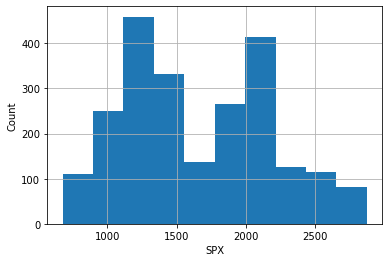

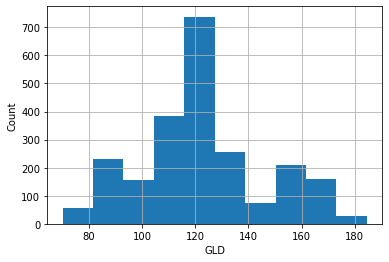

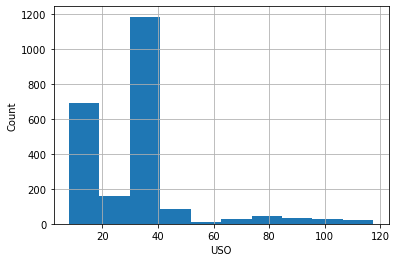

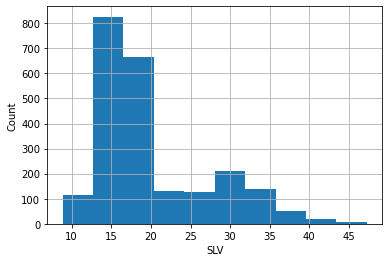

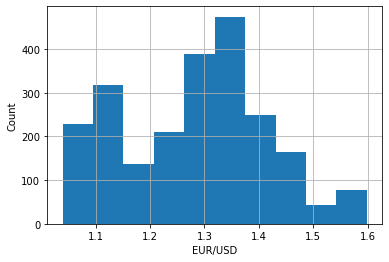

In [9]:
for i in numerical_featues:
    gld[i].hist()
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

In [10]:
# convert column to datetime pandas
gld['Date'] = pd.to_datetime(gld['Date'])

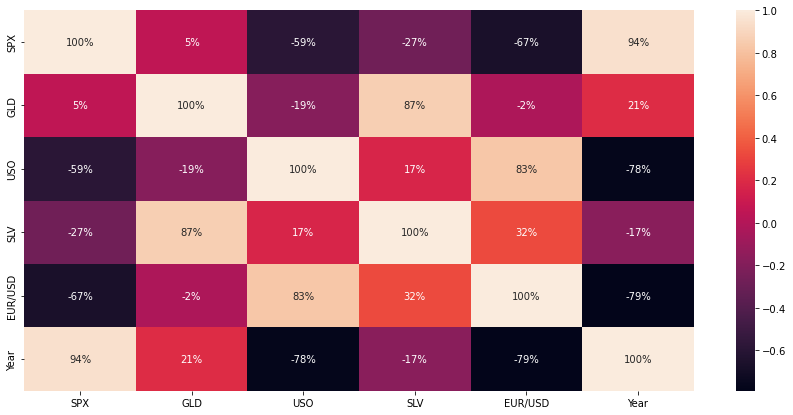

In [11]:
plt.figure(figsize=(15,7))
sns.heatmap(gld.corr() , annot=True , fmt=".0%" );

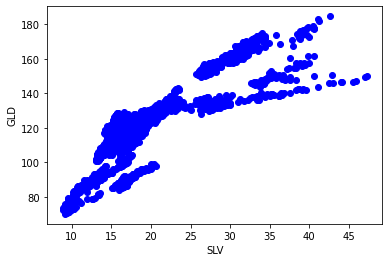

In [12]:
plt.scatter(gld.SLV, gld.GLD, c='blue') #highly correlated
plt.xlabel('SLV')
plt.ylabel('GLD')
plt.show()

Skewness: 0.3341383472692508


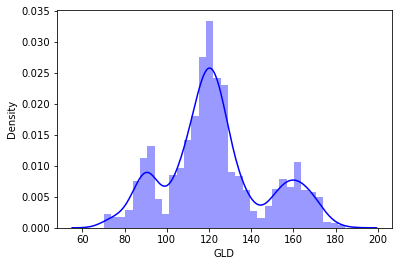

In [13]:
sns.distplot(gld['GLD'], color = 'blue')
print(f"Skewness: {gld['GLD'].skew()}")

`Data is normally distributed `

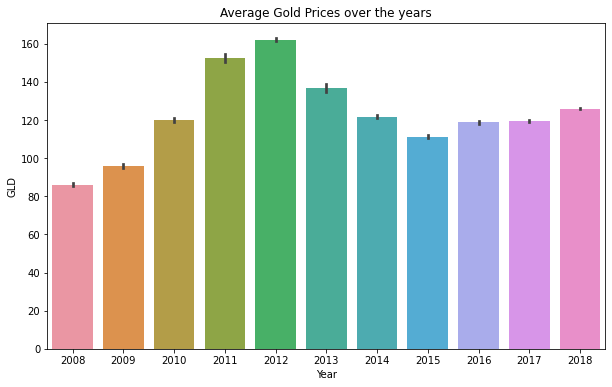

In [14]:
plt.figure(figsize=(10,6))
plt.title('Average Gold Prices over the years')
sns.barplot(x='Year', y='GLD', data=gld);

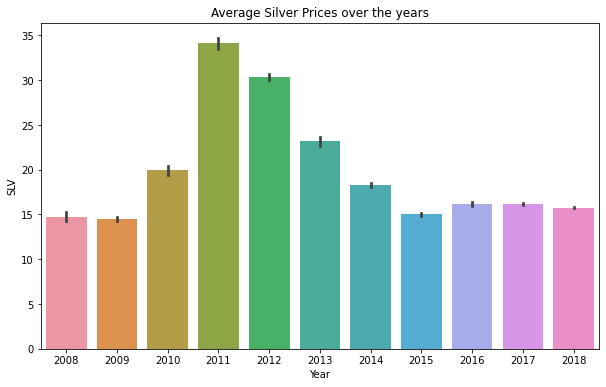

In [15]:
plt.figure(figsize=(10,6))
plt.title('Average Silver Prices over the years')
sns.barplot(x='Year', y='SLV', data=gld);

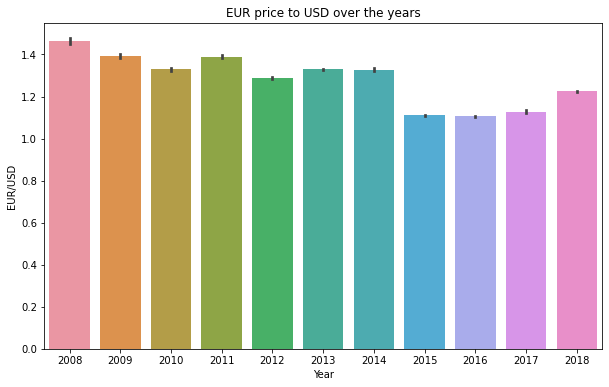

In [16]:
plt.figure(figsize=(10,6))
plt.title('EUR price to USD over the years')
sns.barplot(x='Year', y='EUR/USD', data=gld);

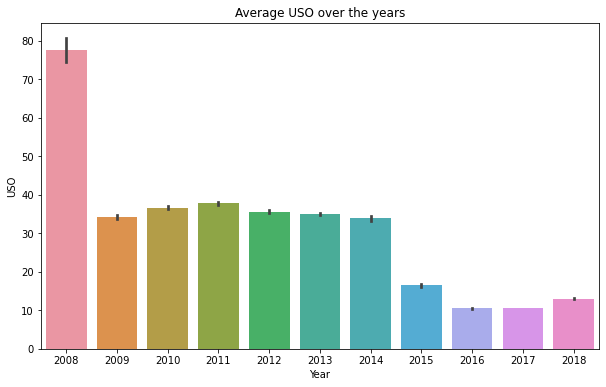

In [17]:
plt.figure(figsize=(10,6))
plt.title('Average USO over the years')
sns.barplot(x='Year', y='USO', data=gld);

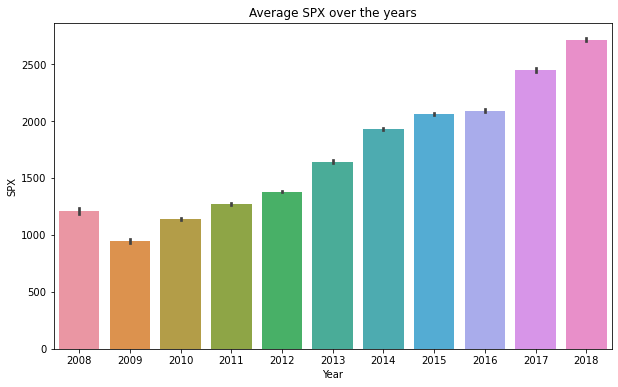

In [18]:
plt.figure(figsize=(10,6))
plt.title('Average SPX over the years')
sns.barplot(x='Year', y='SPX', data=gld);

In [19]:
X = gld.drop(['GLD', 'Date'] , axis=1)
y = gld.GLD
X.head()

,SPX,USO,SLV,EUR/USD,Year
0,1447.160034,78.470001,15.180,1.471692,2008
1,1447.160034,78.370003,15.285,1.474491,2008
2,1411.630005,77.309998,15.167,1.475492,2008
3,1416.180054,75.500000,15.053,1.468299,2008
4,1390.189941,76.059998,15.590,1.557099,2008


### Feature Scaling


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X_scaler[0]

array([-0.39914541,  2.38880956, -0.6917197 ,  1.42975293, -1.5788492 ])

### Splitting the data into Training and Testing data


In [21]:
from sklearn.model_selection import train_test_split
X_train  , X_test , y_train, y_test = train_test_split(X_scaler , y , random_state=44 , shuffle=True ,test_size=0.2)
print(f"Number of Training dataset: {len(X_train)}\nNumber of Testing dataset: {len(X_test)}")

Number of Training dataset: 1832
Number of Testing dataset: 458


### Modeling


In [22]:
def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def r2(model, model_name):
    score = r2_score(y_test, model.predict(X_test))
    print(f"R2 Score for {model_name} is {score * 100}%")
    
from sklearn.metrics import r2_score


### Random Forest Regressor


In [23]:
from sklearn.ensemble import RandomForestRegressor 
rf_model = RandomForestRegressor()
train(rf_model, "Random Forest")
r2(rf_model, "Random Forest")

Random Forest model score on Training data: 99.88095853508527%
Random Forest model score on Testing data: 98.97935646559779%
R2 Score for Random Forest is 98.97935646559779%


### Gradient Boosting


In [24]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
train(gbr, "Gradient Boosting")
r2(gbr, "Gradient Boosting")

Gradient Boosting model score on Training data: 99.08575429596569%
Gradient Boosting model score on Testing data: 98.29178931012085%
R2 Score for Gradient Boosting is 98.29178931012085%


### Bagging

In [25]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()
train(br, "Bagging")
r2(br, "Bagging")

Bagging model score on Training data: 99.81937451803252%
Bagging model score on Testing data: 98.86979576433168%
R2 Score for Bagging is 98.86979576433168%


### LinearRegression

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
train(lr, "Linear Regression")
r2(lr, "Linear Regression")

Linear Regression model score on Training data: 89.90147340318313%
Linear Regression model score on Testing data: 90.942256349719%
R2 Score for Linear Regression is 90.942256349719%


### SVR

In [27]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', gamma='auto', C=50000) #radial base function , 
train(svr, "SVR")
r2(svr, "SVR")

SVR model score on Training data: 99.08019217542133%
SVR model score on Testing data: 98.98924544663%
R2 Score for SVR is 98.98924544663%


### DecisionTreeRegressor

In [28]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
train(dtr, "Decision Tree")
r2(dtr, "Decision Tree")

Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 98.21205910229766%
R2 Score for Decision Tree is 98.21205910229766%
